# Půjčování kol

V souboru [london_merged.csv](london_merged.csv) najdeš informace o počtu vypůjčení jízdních kol
v Londýně.


Definice jednotlivých kódů jsou:

- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
- 2 = scattered clouds / few clouds
- 3 = Broken clouds
- 4 = Cloudy
- 7 = Rain/ light Rain shower/ Light rain
- 10 = rain with thunderstorm
- 26 = snowfall
- 94 = Freezing Fog


In [76]:

weather_dict = {
    1: 'Clear',
    2: 'Scattered clouds',
    3: 'Broken clouds',
    4: 'Cloudy',
    7: 'Rain',
    10: 'Rain with thunderstorm',
    26: 'Snowfall',
    94: 'Freezing fog',
    "All": "All"
}


In [64]:
import pandas

df = pandas.read_csv("london_merged.csv")
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0



1. Vytvoř sloupec, do kterého z časové značky (sloupec `timestamp`) ulož rok.


In [65]:
# convert the timestamp column to datetime
df['timestamp'] = pandas.to_datetime(df['timestamp'])

# extract the year from the timestamp column
df['year'] = df['timestamp'].dt.year

df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015


2. Vytvoř kontingenční tabulku, která porovná kód počasí (sloupec `weather_code`) se sloupcem udávající
rok.


In [77]:
df_pivot = pandas.pivot_table(df, values="cnt", index="weather_code", columns="year", aggfunc=sum, fill_value=0, margins=True)

## Nepovinne, ale hezke :-) 
df_pivot.set_index(df_pivot.index.map(weather_dict), inplace=True)
df_pivot

year,2015,2016,2017,All
weather_code,,,,
Clear,3481388,3651810,13649,7146847
Scattered clouds,2941876,3088392,5312,6035580
Broken clouds,2148351,2083553,11983,4243887
Cloudy,402889,522724,4365,929978
Rain,750632,773568,2261,1526461
Rain with thunderstorm,1642,6526,0,8168
Snowfall,11968,2973,110,15051
All,9738746,10129546,37680,19905972



## Rozšířené zadání

*Rozšířená zadání jsou čistě pro dobrovolníky, kteří mají hodně času a hledají větší výzvu :-)*



Jako hodnoty v kontingenční tabulce zobraz relativní počty jízd pro jednotlivé kódy počasí v jednom roce.

Příklad možného výsledku by byl: v roce 2020 proběhlo 40 % jízd za počasí s kódem 1, 20 % jízd za počasí s kódem 2
a 40 % jízd za počasí s kódem 3 atd. 

In [98]:

df_pivot_percentage = df_pivot.div(df_pivot.iloc[-1,:], axis=1)

# Nepovinne, ale hezke ;-) 
df_pivot_percentage.iloc[:-1,:].style.format("{:,.1%}")


year,2015,2016,2017,All
weather_code,,,,
Clear,35.7%,36.1%,36.2%,35.9%
Scattered clouds,30.2%,30.5%,14.1%,30.3%
Broken clouds,22.1%,20.6%,31.8%,21.3%
Cloudy,4.1%,5.2%,11.6%,4.7%
Rain,7.7%,7.6%,6.0%,7.7%
Rain with thunderstorm,0.0%,0.1%,0.0%,0.0%
Snowfall,0.1%,0.0%,0.3%,0.1%


<AxesSubplot:xlabel='year', ylabel='weather_code'>

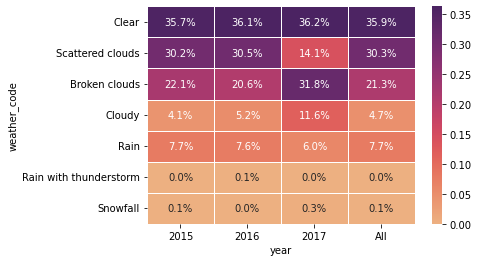

In [103]:
import seaborn as sns
sns.heatmap(df_pivot_percentage.iloc[:-1,:], 
            annot=True, 
            fmt=".1%", 
            linewidths=.5, 
            cmap="flare")
